In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
x_train_orig = pd.read_csv('Results/x_train.csv')
x_train_orig.shape

(504486, 1061)

In [5]:
y_train_orig = pd.read_csv('Results/y_train.csv')
y_train_orig.shape

(504486, 2)

In [83]:
my_list = list(x_train)

print (my_list)

['Unnamed: 0', 'dep_name.C', 'dep_name.B', 'dep_name.A', 'esi.1', 'esi.2', 'esi.3', 'esi.4', 'esi.5', 'age', 'gender.Female', 'gender.Male', 'ethnicity.Hispanic.or.Latino', 'ethnicity.Non.Hispanic', 'ethnicity.Patient.Refused', 'ethnicity.Unknown', 'race.American.Indian.or.Alaska.Native', 'race.Asian', 'race.Black.or.African.American', 'race.Native.Hawaiian.or.Other.Pacific.Islander', 'race.Other', 'race.Patient.Refused', 'race.Unknown', 'race.White.or.Caucasian', 'lang.English', 'lang.Other', 'religion.Baptist', 'religion.Catholic', 'religion.Christian', 'religion.Episcopal', 'religion.Jehovah.s.Witness', 'religion.Jewish', 'religion.Methodist', 'religion.Muslim', 'religion.None', 'religion.Other', 'religion.Pentecostal', 'religion.Protestant', 'religion.Unknown', 'maritalstatus.Civil.Union', 'maritalstatus.Divorced', 'maritalstatus.Legally.Separated', 'maritalstatus.Life.Partner', 'maritalstatus.Married', 'maritalstatus.Other', 'maritalstatus.Significant.Other', 'maritalstatus.Single

In [ ]:
'gender.Male'
'ethnicity.Hispanic.or.Latino'
'race.American.Indian.or.Alaska.Native'
'race.Asian'
'race.Black.or.African.American'
'race.Native.Hawaiian.or.Other.Pacific.Islander'
'race.White.or.Caucasian',
'lang.English'

'insurance_status.Commercial'
'insurance_status.Medicaid'
'insurance_status.Medicare'
'insurance_status.Other'
'insurance_status.Self.pay'
'arrivalmode.ambulance'
'arrivalmode.Car', 'arrivalmode.Other', 'arrivalmode.Police', 'arrivalmode.Public.Transportation',
'arrivalmode.Walk.in', 'arrivalmode.Wheelchair',

'employstatus.Full.Time', 'employstatus.Not.Employed',


In [25]:
# Visualize hospital demographics
y_train_c_vis = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])
x_train_c_vis = x_train_orig.join(y_train_c_vis)
x_train_c_vis = x_train_c_vis[x_train_c_vis['dep_name.C'] == 1]
x_train_c_vis.shape

(64494, 1062)

In [28]:
tot_patients = 64494

In [29]:
male = len(x_train_c_vis[x_train_c_vis['gender.Male'] == 1])
male_admit = len(x_train_c_vis[(x_train_c_vis['gender.Male'] == 1) & (x_train_c_vis['labels'] == 1)])
print("male: ", male / tot_patients )
print("male admitted: ", male_admit / male )


male:  0.4433280615251031
male admitted:  0.16214325685506437


In [30]:
hisp_latino = len(x_train_c_vis[x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1])
hisp_latino_admit = len(x_train_c_vis[(x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1) & (x_train_c_vis['labels'] == 1)])
print("hisp_latino: ", hisp_latino / tot_patients )
print("hisp_latino admitted: ", hisp_latino_admit / hisp_latino)

native_american_alaskan = len(x_train_c_vis[x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1])
native_american_alaskan_admit = len(x_train_c_vis[(x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_american_alaskan: ", native_american_alaskan / tot_patients )
print("native_american_alaskan admitted: ", native_american_alaskan_admit / native_american_alaskan)

asian = len(x_train_c_vis[x_train_c_vis['race.Asian'] == 1])
asian_admit = len(x_train_c_vis[(x_train_c_vis['race.Asian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("asian: ", asian / tot_patients )
print("asian admitted: ", asian_admit / asian)


black = len(x_train_c_vis[x_train_c_vis['race.Black.or.African.American'] == 1])
black_admit = len(x_train_c_vis[(x_train_c_vis['race.Black.or.African.American'] == 1) & (x_train_c_vis['labels'] == 1)])
print("black: ", black / tot_patients )
print("black admitted: ", black_admit / black)

native_hawaiian = len(x_train_c_vis[x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1])
native_hawaiian_admit = len(x_train_c_vis[(x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_hawaiian: ", native_hawaiian / tot_patients )
print("native_hawaiian admitted: ", native_hawaiian_admit / native_hawaiian)

white = len(x_train_c_vis[x_train_c_vis['race.White.or.Caucasian'] == 1])
white_admit = len(x_train_c_vis[(x_train_c_vis['race.White.or.Caucasian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("white: ", white / tot_patients )
print("white admitted: ", white_admit / white)


hisp_latino:  0.06048624678264645
hisp_latino admitted:  0.09177134068187644
native_american_alaskan:  0.0006822340062641486
native_american_alaskan admitted:  0.13636363636363635
asian:  0.005116755046981115
asian admitted:  0.15151515151515152
black:  0.02772350916364313
black admitted:  0.09675615212527965
native_hawaiian:  0.0002635904115111483
native_hawaiian admitted:  0.11764705882352941
white:  0.899448010667659
white admitted:  0.16218173042114153


In [32]:
commercial = len(x_train_c_vis[x_train_c_vis['insurance_status.Commercial'] == 1])
commercial_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Commercial'] == 1) & (x_train_c_vis['labels'] == 1)])
print("commercial: ", commercial / tot_patients )
print("commercial admitted: ", commercial_admit / commercial)

medicaid = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicaid'] == 1])
medicaid_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicaid'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicaid: ", medicaid / tot_patients )
print("medicaid admitted: ", medicaid_admit / medicaid)

medicare = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicare'] == 1])
medicare_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicare'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicare: ", medicare / tot_patients )
print("medicare admitted: ", medicare_admit / medicare)

other = len(x_train_c_vis[x_train_c_vis['insurance_status.Other'] == 1])
other_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Other'] == 1) & (x_train_c_vis['labels'] == 1)])
print("other: ", other / tot_patients )
print("other admitted: ", other_admit / other)

self_pay = len(x_train_c_vis[x_train_c_vis['insurance_status.Self.pay'] == 1])
self_pay_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Self.pay'] == 1) & (x_train_c_vis['labels'] == 1)])
print("self pay: ", self_pay / tot_patients )
print("self pay admitted: ", self_pay_admit / self_pay)



commercial:  0.5266846528359227
commercial admitted:  0.13707018370230806
medicaid:  0.16722485812633733
medicaid admitted:  0.08400556328233658
medicare:  0.2520854653146029
medicare admitted:  0.263439537458482
other:  0.053307284398548704
other admitted:  0.0477021524141943
self pay:  0.0006977393245883338
self pay admitted:  0.9777777777777777


In [30]:
y_train = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])

In [31]:
x_train = x_train_orig.join(y_train)

In [32]:
x_test = x_train.copy()

In [33]:
x_test.shape

(504486, 1062)

In [34]:
x_train = x_train[x_train['dep_name.C'] == 0]

In [35]:
x_test = x_test[x_test['dep_name.C'] == 1]

In [36]:
x_train.shape

(439992, 1062)

In [37]:
x_test.shape

(64494, 1062)

In [38]:
# import scipy.sparse as sparse
# import matplotlib.pyplot as plt
# %matplotlib inline

In [39]:
# x_train_array = x_train.to_numpy()

In [40]:
## plt.figure(figsize=(15, 15))
# plt.spy(x_train_array, precision = 0.1, markersize = 5)

In [41]:
y_train = pd.DataFrame(data=x_train['labels'])

In [42]:
y_test = pd.DataFrame(data=x_test['labels'])

In [43]:
x_train = x_train.drop(['labels'], axis=1)

In [44]:
x_test = x_test.drop(['labels'], axis=1)

In [81]:
y_test.shape

(64494, 1)

In [46]:
# a: (290107, 1061)
# b: (149885, 1061)
# c: (64494, 1061)

In [47]:
# fit model no training data
model = XGBClassifier(max_depth = 20, eta = 0.3,
               nthread = 5, nrounds = 30,
               eval_metric = 'auc',
               objective = "binary:logistic",
               colsample_bylevel = 0.05)
model.fit(x_train, y_train.values.ravel())

[22:48:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.05,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=5, nrounds=30,
              nthread=5, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [49]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.11%


In [50]:
# calculate roc curve
fpr_C, tpr_C, thresholds_C = roc_curve(y_test, y_pred)

auc_C = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_C)

AUC: 0.779


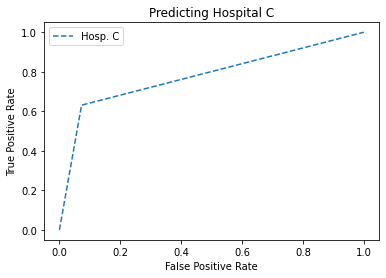

In [51]:
pyplot.plot(fpr_C, tpr_C, linestyle='--', label='Hosp. C')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Predicting Hospital C')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [53]:
from sklearn.metrics import confusion_matrix

tn_c, fp_c, fn_c, tp_c = confusion_matrix(y_test, y_pred).ravel()

sensitivity_c = tp_c / (tp_c+fn_c)
print('sensitivity (C): ', sensitivity_c)

specificity_c = tn_c / (tn_c+fp_c)
print('specificity (C): ', specificity_c)


sensitivity (C):  0.631154879140555
specificity (C):  0.9272239672305799


In [ ]:
# #2) Fit model on all data except test set, using the optimized hyperparameters

# bst <- xgboost(data = x_train, label = y_train,
#                max_depth = 20, eta = 0.3,
#                nthread = 5, nrounds = 30,
#                eval_metric = 'auc',
#                objective = "binary:logistic",
#                colsample_bylevel = 0.05)

# bst_pred_test <- predict(bst, x_test)
# roc(y_test, bst_pred_test)
# ci.auc(roc(y_test, bst_pred_test), conf.level = 0.95)

In [77]:
print("C admit rate:", len(y_train[y_train['labels']>0])/len(y_train))

C admit rate: 0.318287605229186


### PREDICTING HOSPITAL A

In [18]:
y_train_a = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])

x_train_a = x_train_orig.join(y_train_a)

x_test_a = x_train_a.copy()

x_train_a = x_train_a[x_train_a['dep_name.A'] == 0]

x_test_a = x_test_a[x_test_a['dep_name.A'] == 1]

In [20]:
len(x_train_a)

214379

In [56]:
y_train_a = pd.DataFrame(data=x_train_a['labels'])
y_test_a = pd.DataFrame(data=x_test_a['labels'])

In [33]:
y_train_a = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])

x_train_a = x_train_orig.join(y_train_a)

x_test_a = x_train_a.copy()
x_train_a = x_train_a[x_train_a['dep_name.A'] == 1]

x_train_a.shape

(290107, 1062)

In [34]:
x_train_c_vis = x_train_a
tot_patients = len(x_train_c_vis)

male = len(x_train_c_vis[x_train_c_vis['gender.Male'] == 1])
male_admit = len(x_train_c_vis[(x_train_c_vis['gender.Male'] == 1) & (x_train_c_vis['labels'] == 1)])
print("male: ", male / tot_patients )
print("male admitted: ", male_admit / male )

hisp_latino = len(x_train_c_vis[x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1])
hisp_latino_admit = len(x_train_c_vis[(x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1) & (x_train_c_vis['labels'] == 1)])
print("hisp_latino: ", hisp_latino / tot_patients )
print("hisp_latino admitted: ", hisp_latino_admit / hisp_latino)

native_american_alaskan = len(x_train_c_vis[x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1])
native_american_alaskan_admit = len(x_train_c_vis[(x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_american_alaskan: ", native_american_alaskan / tot_patients )
print("native_american_alaskan admitted: ", native_american_alaskan_admit / native_american_alaskan)

asian = len(x_train_c_vis[x_train_c_vis['race.Asian'] == 1])
asian_admit = len(x_train_c_vis[(x_train_c_vis['race.Asian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("asian: ", asian / tot_patients )
print("asian admitted: ", asian_admit / asian)


black = len(x_train_c_vis[x_train_c_vis['race.Black.or.African.American'] == 1])
black_admit = len(x_train_c_vis[(x_train_c_vis['race.Black.or.African.American'] == 1) & (x_train_c_vis['labels'] == 1)])
print("black: ", black / tot_patients )
print("black admitted: ", black_admit / black)

native_hawaiian = len(x_train_c_vis[x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1])
native_hawaiian_admit = len(x_train_c_vis[(x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_hawaiian: ", native_hawaiian / tot_patients )
print("native_hawaiian admitted: ", native_hawaiian_admit / native_hawaiian)

white = len(x_train_c_vis[x_train_c_vis['race.White.or.Caucasian'] == 1])
white_admit = len(x_train_c_vis[(x_train_c_vis['race.White.or.Caucasian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("white: ", white / tot_patients )
print("white admitted: ", white_admit / white)

commercial = len(x_train_c_vis[x_train_c_vis['insurance_status.Commercial'] == 1])
commercial_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Commercial'] == 1) & (x_train_c_vis['labels'] == 1)])
print("commercial: ", commercial / tot_patients )
print("commercial admitted: ", commercial_admit / commercial)

medicaid = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicaid'] == 1])
medicaid_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicaid'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicaid: ", medicaid / tot_patients )
print("medicaid admitted: ", medicaid_admit / medicaid)

medicare = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicare'] == 1])
medicare_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicare'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicare: ", medicare / tot_patients )
print("medicare admitted: ", medicare_admit / medicare)

other = len(x_train_c_vis[x_train_c_vis['insurance_status.Other'] == 1])
other_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Other'] == 1) & (x_train_c_vis['labels'] == 1)])
print("other: ", other / tot_patients )
print("other admitted: ", other_admit / other)

self_pay = len(x_train_c_vis[x_train_c_vis['insurance_status.Self.pay'] == 1])
self_pay_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Self.pay'] == 1) & (x_train_c_vis['labels'] == 1)])
print("self pay: ", self_pay / tot_patients )
print("self pay admitted: ", self_pay_admit / self_pay)

male:  0.46385299217185383
male admitted:  0.3291297271990904
hisp_latino:  0.19006090856132393
hisp_latino admitted:  0.21932242736406835
native_american_alaskan:  0.0009651611302036834
native_american_alaskan admitted:  0.3607142857142857
asian:  0.014708366223496848
asian admitted:  0.22287321303023203
black:  0.27223059078202183
black admitted:  0.2663720623987034
native_hawaiian:  0.0007548938839807382
native_hawaiian admitted:  0.2420091324200913
white:  0.5114733529352963
white admitted:  0.38964294860562604
commercial:  0.33895080091138785
commercial admitted:  0.3151161371679616
medicaid:  0.3420944685926227
medicaid admitted:  0.24804522187739309
medicare:  0.20347320126711868
medicare admitted:  0.5716681631062698
other:  0.11154505061925428
other admitted:  0.06684177997527813
self pay:  0.003936478609616452
self pay admitted:  0.9588441330998249


In [57]:
x_train_a = x_train_a.drop(['labels'], axis=1)
x_test_a = x_test_a.drop(['labels'], axis=1)

In [58]:
# fit model no training data
model_a = XGBClassifier(max_depth = 20, eta = 0.3,
               nthread = 5, nrounds = 30,
               eval_metric = 'auc',
               objective = "binary:logistic",
               colsample_bylevel = 0.05)
model_a.fit(x_train_a, y_train_a.values.ravel())

[23:21:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.05,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=5, nrounds=30,
              nthread=5, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_a = model.predict(x_test_a)
predictions_a = [round(value) for value in y_pred_a]

# evaluate predictions
accuracy_a = accuracy_score(y_test_a, predictions_a)
print("Accuracy (A): %.2f%%" % (accuracy_a * 100.0))

Accuracy (A): 96.37%


In [60]:
# calculate roc curve
fpr_a, tpr_a, thresholds_a = roc_curve(y_test_a, y_pred_a)

auc_a = roc_auc_score(y_test_a, y_pred_a)
print('AUC (A): %.3f' % auc_a)

AUC (A): 0.948


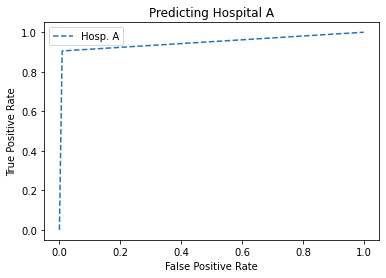

In [61]:
pyplot.plot(fpr_a, tpr_a, linestyle='--', label='Hosp. A')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Predicting Hospital A')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [63]:
tn_a, fp_a, fn_a, tp_a = confusion_matrix(y_test_a, y_pred_a).ravel()

sensitivity_a = tp_a / (tp_a+fn_a)
print('sensitivity (A): ', sensitivity_a)

specificity_a = tn_a / (tn_a+fp_a)
print('specificity (A): ', specificity_a)

sensitivity (A):  0.9054488910005831
specificity (A):  0.9910025772021408


In [74]:
print("A admit rate:", len(y_train_a[y_train_a['labels']>0])/len(y_train_a))

A admit rate: 0.2681745879960257


In [57]:
### PREDICTING HOSPITAL B

In [21]:
y_train_b = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])

x_train_b = x_train_orig.join(y_train_b)

x_test_b = x_train_b.copy()

x_train_b = x_train_b[x_train_b['dep_name.B'] == 0]

x_test_b = x_test_b[x_test_b['dep_name.B'] == 1]

In [23]:
x_train_b.shape

(354601, 1062)

In [35]:
y_train_b = y_train_orig.rename(columns={"as.matrix.y_train.": "labels"}).drop(columns=['Unnamed: 0'])

x_train_b = x_train_orig.join(y_train_b)

x_test_b = x_train_b.copy()

x_train_b = x_train_b[x_train_b['dep_name.B'] == 1]

x_train_b.shape

(149885, 1062)

In [36]:
x_train_c_vis = x_train_b
tot_patients = len(x_train_c_vis)

male = len(x_train_c_vis[x_train_c_vis['gender.Male'] == 1])
male_admit = len(x_train_c_vis[(x_train_c_vis['gender.Male'] == 1) & (x_train_c_vis['labels'] == 1)])
print("male: ", male / tot_patients )
print("male admitted: ", male_admit / male )

hisp_latino = len(x_train_c_vis[x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1])
hisp_latino_admit = len(x_train_c_vis[(x_train_c_vis['ethnicity.Hispanic.or.Latino'] == 1) & (x_train_c_vis['labels'] == 1)])
print("hisp_latino: ", hisp_latino / tot_patients )
print("hisp_latino admitted: ", hisp_latino_admit / hisp_latino)

native_american_alaskan = len(x_train_c_vis[x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1])
native_american_alaskan_admit = len(x_train_c_vis[(x_train_c_vis['race.American.Indian.or.Alaska.Native'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_american_alaskan: ", native_american_alaskan / tot_patients )
print("native_american_alaskan admitted: ", native_american_alaskan_admit / native_american_alaskan)

asian = len(x_train_c_vis[x_train_c_vis['race.Asian'] == 1])
asian_admit = len(x_train_c_vis[(x_train_c_vis['race.Asian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("asian: ", asian / tot_patients )
print("asian admitted: ", asian_admit / asian)


black = len(x_train_c_vis[x_train_c_vis['race.Black.or.African.American'] == 1])
black_admit = len(x_train_c_vis[(x_train_c_vis['race.Black.or.African.American'] == 1) & (x_train_c_vis['labels'] == 1)])
print("black: ", black / tot_patients )
print("black admitted: ", black_admit / black)

native_hawaiian = len(x_train_c_vis[x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1])
native_hawaiian_admit = len(x_train_c_vis[(x_train_c_vis['race.Native.Hawaiian.or.Other.Pacific.Islander'] == 1) & (x_train_c_vis['labels'] == 1)])
print("native_hawaiian: ", native_hawaiian / tot_patients )
print("native_hawaiian admitted: ", native_hawaiian_admit / native_hawaiian)

white = len(x_train_c_vis[x_train_c_vis['race.White.or.Caucasian'] == 1])
white_admit = len(x_train_c_vis[(x_train_c_vis['race.White.or.Caucasian'] == 1) & (x_train_c_vis['labels'] == 1)])
print("white: ", white / tot_patients )
print("white admitted: ", white_admit / white)

commercial = len(x_train_c_vis[x_train_c_vis['insurance_status.Commercial'] == 1])
commercial_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Commercial'] == 1) & (x_train_c_vis['labels'] == 1)])
print("commercial: ", commercial / tot_patients )
print("commercial admitted: ", commercial_admit / commercial)

medicaid = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicaid'] == 1])
medicaid_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicaid'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicaid: ", medicaid / tot_patients )
print("medicaid admitted: ", medicaid_admit / medicaid)

medicare = len(x_train_c_vis[x_train_c_vis['insurance_status.Medicare'] == 1])
medicare_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Medicare'] == 1) & (x_train_c_vis['labels'] == 1)])
print("medicare: ", medicare / tot_patients )
print("medicare admitted: ", medicare_admit / medicare)

other = len(x_train_c_vis[x_train_c_vis['insurance_status.Other'] == 1])
other_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Other'] == 1) & (x_train_c_vis['labels'] == 1)])
print("other: ", other / tot_patients )
print("other admitted: ", other_admit / other)

self_pay = len(x_train_c_vis[x_train_c_vis['insurance_status.Self.pay'] == 1])
self_pay_admit = len(x_train_c_vis[(x_train_c_vis['insurance_status.Self.pay'] == 1) & (x_train_c_vis['labels'] == 1)])
print("self pay: ", self_pay / tot_patients )
print("self pay admitted: ", self_pay_admit / self_pay)

male:  0.4171531507489075
male admitted:  0.32790083966413436
hisp_latino:  0.16917636854922108
hisp_latino admitted:  0.18637851480853412
native_american_alaskan:  0.0008873469660072722
native_american_alaskan admitted:  0.23308270676691728
asian:  0.003929679420889349
asian admitted:  0.3565365025466893
black:  0.4087934082796811
black admitted:  0.20671758715236976
native_hawaiian:  0.0006404910431330687
native_hawaiian admitted:  0.20833333333333334
white:  0.42205691029789505
white admitted:  0.4690167562440721
commercial:  0.25801114187543783
commercial admitted:  0.38730864708316093
medicaid:  0.4361410414651233
medicaid admitted:  0.1721252543176638
medicare:  0.236047636521333
medicare admitted:  0.5664499717354438
other:  0.06742502585315409
other admitted:  0.08292103700771819
self pay:  0.0023751542849517965
self pay admitted:  0.9241573033707865


In [65]:
y_train_b = pd.DataFrame(data=x_train_b['labels'])
y_test_b = pd.DataFrame(data=x_test_b['labels'])

x_train_b = x_train_b.drop(['labels'], axis=1)
x_test_b = x_test_b.drop(['labels'], axis=1)

In [66]:
# fit model no training data
model_b = XGBClassifier(max_depth = 20, eta = 0.3,
               nthread = 5, nrounds = 30,
               eval_metric = 'auc',
               objective = "binary:logistic",
               colsample_bylevel = 0.05)
model_b.fit(x_train_b, y_train_b.values.ravel())

[23:31:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.05,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=5, nrounds=30,
              nthread=5, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred_b = model.predict(x_test_b)
predictions_b = [round(value) for value in y_pred_b]

# evaluate predictions
accuracy_b = accuracy_score(y_test_b, predictions_b)
print("Accuracy (B): %.2f%%" % (accuracy_b * 100.0))

Accuracy (B): 97.44%


In [68]:
# calculate roc curve
fpr_b, tpr_b, thresholds_b = roc_curve(y_test_b, y_pred_b)

auc_b = roc_auc_score(y_test_b, y_pred_b)
print('AUC (B): %.3f' % auc_b)

AUC (B): 0.964


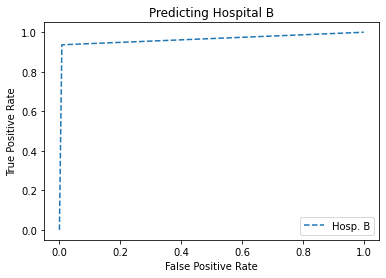

In [69]:
pyplot.plot(fpr_b, tpr_b, linestyle='--', label='Hosp. B')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Predicting Hospital B')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [70]:
tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_test_b, y_pred_b).ravel()

sensitivity_b = tp_b / (tp_b+fn_b)
print('sensitivity (B): ', sensitivity_b)

specificity_b = tn_b / (tn_b+fp_b)
print('specificity (B): ', specificity_b)

sensitivity (B):  0.9365065980859226
specificity (B):  0.9919763389850361


In [78]:
print("B admit rate:", len(y_train_b[y_train_b['labels']>0])/len(y_train_b))

B admit rate: 0.28950566975276437


In [80]:
x_train_b.mean()

Unnamed: 0                  283670.017270
dep_name.C                       0.181878
dep_name.B                       0.000000
dep_name.A                       0.818122
esi.1                            0.011790
                                ...      
cc_woundcheck                    0.004550
cc_woundinfection                0.003006
X.cc_woundre.evaluation.         0.001479
cc_wristinjury                   0.001538
cc_wristpain                     0.002357
Length: 1061, dtype: float64

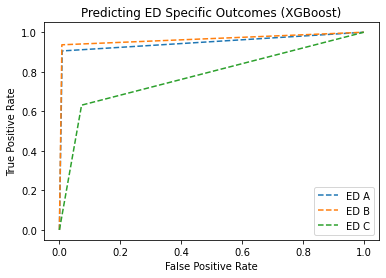

In [82]:
pyplot.plot(fpr_a, tpr_a, linestyle='--', label='ED A')
pyplot.plot(fpr_b, tpr_b, linestyle='--', label='ED B')
pyplot.plot(fpr_C, tpr_C, linestyle='--', label='ED C')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Predicting ED Specific Outcomes (XGBoost)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()